# Exploratory Data Analysis for Yulu Electric Bike 

Remove Outliers

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode, download_plotlyjs

init_notebook_mode(connected=True)


In [14]:
import statistics as st
import scipy.stats as stats
from scipy.stats import ttest_ind
from datetime import datetime
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [15]:
df=pd.read_csv('D:\DS\Capstone Proj/yulu_bike_sharing_dataset.csv')

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [18]:
df.describe()



,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [19]:
df.shape

(10886, 12)

In [29]:
px.box(df['count'])


In [30]:
px.box(df,x='workingday',y='count')

### Removing Outliers
To remove outliers from our dataset we can use IQR Method in which we calculate

upper-fence = Q3 + 1.5(IQR)

lower-fence = Q1 - 1.5(IQR)

where, IQR = Q3 - Q1

Q1 & Q3 are First (25%) and Third (75%) Quantile respectively

In [31]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)

In [32]:
IQR = Q3 - Q1
upper_fence = Q3 + (1.5*IQR)
lower_fence = Q1 - (1.5*IQR)

In [33]:
print("Interquartile range is", IQR)
print("upper fence is", upper_fence)
print("lower fence is", lower_fence)

Interquartile range is 242.0
upper fence is 647.0
lower fence is -321.0


In [35]:
#The following changes would remove the outliers from "count" column

df=df[(df['count']>lower_fence) & (df['count']<upper_fence)]

In [37]:
df.shape

(10583, 12)

In [38]:
px.box(df['count'])

## Changing "datetime" column to "datetime" data type from "object type"

By extracting "hour", "month", "year" data from "datetime" column, we will be able to analyze various information such as during which months, hours- the demand is maximum

In [39]:
df['datetime']=pd.to_datetime(df['datetime'])

df['hour']=df['datetime'].dt.hour

df['month']=df['datetime'].dt.month

df['year']=df['datetime'].dt.year

In [40]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


## Checking for null values


<AxesSubplot:>

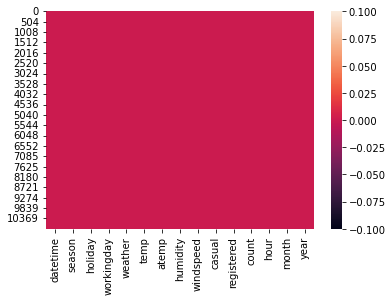

In [41]:
sns.heatmap(df.isnull())

We can see there is no null value present in our dataset, so we can move forward for further analysis

Correlation between variables


In [42]:
round(df.corr(),2) #rounding-off correlation between our variables

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
season,1.00,0.03,-0.01,0.01,0.26,0.27,0.19,-0.15,0.10,0.17,0.17,-0.01,0.97,-0.01
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.00,0.00,0.01,0.05,-0.01,0.01,0.00,0.00,0.02
workingday,-0.01,-0.25,1.00,0.03,0.02,0.02,-0.01,0.02,-0.33,0.09,-0.02,-0.00,-0.01,-0.01
weather,0.01,-0.01,0.03,1.00,-0.05,-0.05,0.41,0.01,-0.13,-0.11,-0.13,-0.02,0.01,-0.01
temp,0.26,0.00,0.02,-0.05,1.00,0.99,-0.05,-0.02,0.47,0.30,0.39,0.13,0.26,0.04
atemp,0.27,-0.00,0.02,-0.05,0.99,1.00,-0.03,-0.06,0.46,0.30,0.38,0.13,0.27,0.04
humidity,0.19,0.00,-0.01,0.41,-0.05,-0.03,1.00,-0.32,-0.34,-0.27,-0.32,-0.27,0.21,-0.07
windspeed,-0.15,0.01,0.02,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.10,0.11,0.15,-0.15,-0.02
casual,0.10,0.05,-0.33,-0.13,0.47,0.46,-0.34,0.09,1.00,0.51,0.72,0.30,0.10,0.11
registered,0.17,-0.01,0.09,-0.11,0.30,0.30,-0.27,0.10,0.51,1.00,0.97,0.41,0.17,0.21


<AxesSubplot:>

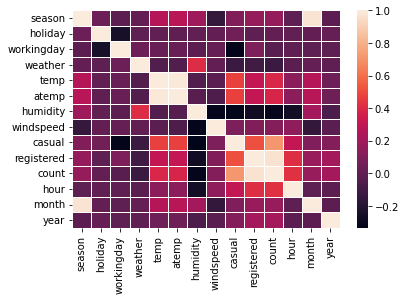

In [43]:
#we can also see this graphically by using heatmap from seaborn library

sns.heatmap(df.corr(),linewidths=0.5)

"Count" has a strong positive correlation with "casual" and "rental" (0.72 and 0.91 respectively), suggesting their combined impact. 
It also moderately relates to "temp" and "atemp" (0.39 and 0.38), indicating count increases with temperature. 
There's a positive relation (0.43) with "hour" and a negative correlation (-0.32) with "humidity".
Further statistical tests are needed for confirmation.

# Data Visualiztion

In [45]:
px.pie(df,names='season')

In [46]:
px.pie(df,names='weather')

In [47]:
px.pie(df,names='workingday')

<AxesSubplot:xlabel='hour', ylabel='count'>

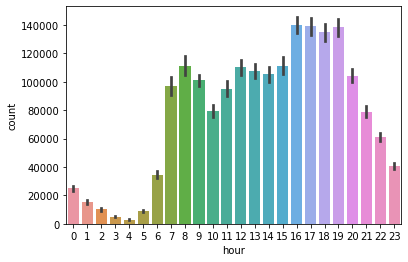

In [54]:

sns.barplot(data=df, y='count', x='hour', estimator=sum)


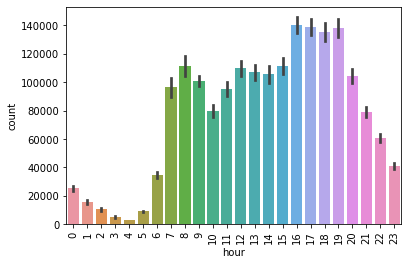

In [56]:
fig = sns.barplot(data=df, y='count', x='hour', estimator=sum)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

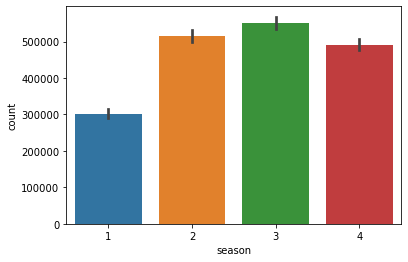

In [58]:
sns.barplot(data=df, y='count', x='season', estimator=sum)

<AxesSubplot:xlabel='month', ylabel='count'>

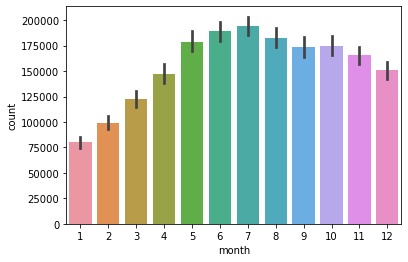

In [59]:
sns.barplot(data=df, y='count', x='month', estimator=sum)

In [60]:
hour_sum = df.groupby('hour')['count'].sum().sort_values(ascending=False)
hour_sum[:5]

hour
16    140123
17    139138
19    138353
18    135258
8     111203
Name: count, dtype: int64

In [61]:
month_sum = df.groupby('month')['count'].sum().sort_values(ascending=False)
month_sum[:5]

month
7     194177
6     189028
8     182855
5     178752
10    174659
Name: count, dtype: int64

# Hypothesis Testing

## 1. Working Day has effect on number of electric cycles rented

Null Hypothesis (H0) = There is not much difference between "count" on "weekends/holidays" or "weekdays/non-holidays"

Alternate Hypothesis (H1) = The count differs

Significance Value = 0.05

In [62]:
workday = df[df['workingday']==1]
workday.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,1,2011
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,1,2011


In [63]:
non_workday = df[df['workingday']==0]
non_workday.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011


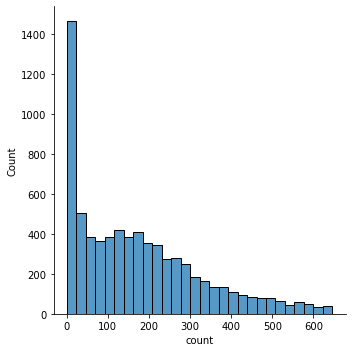

In [64]:
sns.displot(workday,x='count')

sns.displot(non_workday,x='count')

As we can see that the "count" distribution is right-skewed therefore we can use non-parametric test to test our hypothesis

In [66]:
mwu_stat, p_val = mannwhitneyu(workday['count'],non_workday['count'])

In [67]:
print("U statistic: ", mwu_stat)
print("P-Value: ", p_val)

U statistic:  11998982.0
P-Value:  0.08466110521914866


As our P-Value is 0.08 which is higher than significance value (0.05), we fail to reject our null hypothesis
Thus we can say that there is not much difference in electric cycles rented on "weekends/holidays" or "weekdays/non-holidays"

## 2. No. of cycles rented similar or different in different seasons

Null Hypothesis (H0) = There is not much difference between No. of cycles rented similar or different in different seasons

Alternate Hypothesis (H1) = There is significant difference between No. of cycles rented similar or different in different seasons

Significance Value = 0.05

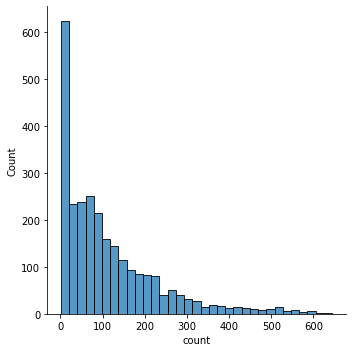

In [68]:
sns.displot(df[df['season']==1],x='count')


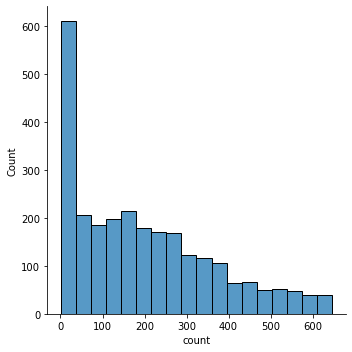

In [69]:
sns.displot(df[df['season']==2],x='count')


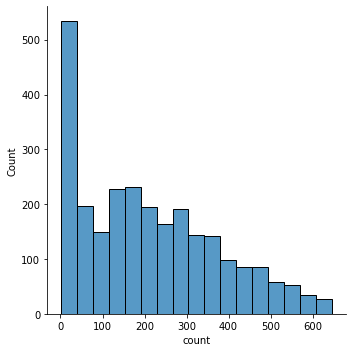

In [70]:
sns.displot(df[df['season']==3],x='count')


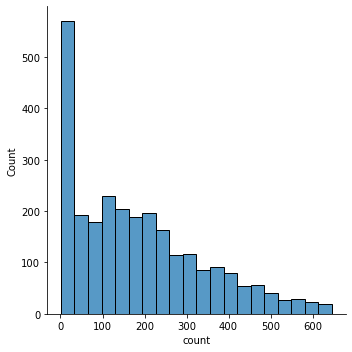

In [71]:
sns.displot(df[df['season']==4],x='count')


Again this is not normal distribution so we can use a non-parameterized test here to test our hypothesis
Here we are using Kruskal-Wallis test

In [72]:
h_stat, p_value = kruskal(df['count'][df['season']==1],
                          df['count'][df['season']==2],
                          df['count'][df['season']==3],
                          df['count'][df['season']==4])

In [73]:
print("H statistic vale: ", h_stat)
print("P Value: ", p_value)

H statistic vale:  619.3679817851395
P Value:  6.376253250003707e-134


We can see that p-value is so much smaller than the significance value(0.05). Therfore, we can sya that we have enough evidence to reject our null hypothesis and accept the alternate hypothsis.

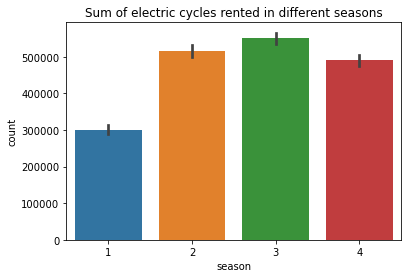

In [75]:
sns.barplot(data=df, y='count', x='season', estimator=sum)
plt.title("Sum of electric cycles rented in different seasons")
plt.show()